In [3]:
import sys
sys.path.insert(0, "/home/afreiburger/env_packages/lib/python3.11/site-packages")

from os import system
import sys
display(sys.path)

['/home/afreiburger/env_packages/lib/python3.11/site-packages',
 '/scratch/shared/code/MicrobiomeNotebooks/WesternDietMicrobiomes',
 '/usr/local/lib/python311.zip',
 '/usr/local/lib/python3.11',
 '/usr/local/lib/python3.11/lib-dynload',
 '',
 '/home/afreiburger/.local/lib/python3.11/site-packages',
 '/usr/local/lib/python3.11/site-packages']

# Community flux processing

In [1]:
from pandas import read_csv, concat

RCfluxes = read_csv("CommunityFluxSolution2.csv").drop("Unnamed: 0", axis=1).set_index("id")
RCfluxes.columns = [x.replace("-ABX", '') for x in RCfluxes.columns]
WDfluxes = read_csv("CommunityFluxSolution3.csv").drop("Unnamed: 0", axis=1).set_index("id")
WDfluxes.columns = [x.replace("-ABX", '') for x in WDfluxes.columns]
fluxes = concat([RCfluxes, WDfluxes], axis=1)
fluxes.head()        

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
id,,,,,,,,,,,,
max_growth,8.445032,8.445008,8.445007,8.445028,8.443695,8.440343,8.445019,6.680349,6.580025,7.077531,8.445074,8.445041
carbon_uptake,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
flux fitting objective,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum probability objective,1132.197592,1144.176486,1017.927115,998.516143,859.482377,1102.144781,1539.739989,1767.514838,1300.307353,1757.194520,881.374774,1190.462655
rxn02201_c1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Oxygen fluxes chart

### species-level oxygen consumption

In [17]:
o2rxns = fluxes.loc["EX_cpd00007_e0"]
display(o2rxns)

RC_-1.5   -20.000000
RC_1.5    -20.000000
RC_4.0    -10.593463
RC_6.0    -13.530593
RC_9.0    -17.179433
RC_12.5    -7.160259
WD_-1.5   -20.000000
WD_1.5    -20.000000
WD_4.0    -20.000000
WD_6.0    -20.000000
WD_9.0    -20.000000
WD_12.5   -20.000000
Name: EX_cpd00007_e0, dtype: float64

In [2]:
total_fluxes = abs(fluxes.copy())
total_fluxes.drop(["max_growth", "carbon_uptake",
                   "minimum probability objective"], inplace=True)
total_fluxes.drop([r for r in total_fluxes.index if any([x in r for x in ["bio", "SK_"]])], inplace=True)
bulk_total_fluxes = total_fluxes.sum()
display(bulk_total_fluxes)

RC_-1.5    3068.424910
RC_1.5     2952.177867
RC_4.0     2467.799266
RC_6.0     2456.523448
RC_9.0     2871.126979
RC_12.5    3311.381124
WD_-1.5    3549.836810
WD_1.5     3668.331318
WD_4.0     2770.230005
WD_6.0     3959.916838
WD_9.0     2737.455532
WD_12.5    3207.882147
dtype: float64

In [3]:
total_member_fluxes = abs(fluxes.copy())
total_member_fluxes.drop(["max_growth", "carbon_uptake", 
                          "minimum probability objective"], inplace=True)
total_member_fluxes.index = [i.split("_")[-1].replace("c", '') for i in total_member_fluxes.index]
total_member_fluxes.index.name = "compartment"
total_member_fluxes = total_member_fluxes.groupby("compartment", axis=0).sum()
display(total_member_fluxes)
biomasses = total_member_fluxes[total_member_fluxes.index.str.contains("bio")]
biomasses.index = [x.replace("bio", '') for x in biomasses.index]
display(biomasses)

/var/folders/j8/f5pb70wx5gn1qv1nz77lfhyr0000gn/T/ipykernel_31943/3635964768.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  total_member_fluxes = total_member_fluxes.groupby("compartment", axis=0).sum()


,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
compartment,,,,,,,,,,,,
0,4.222516,4.222504,4.222503,4.222514,4.221847,4.220171,4.222509,3.340174,3.290012,3.538765,4.222537,4.222520
1,164.246580,421.100291,898.609424,979.978451,174.182097,80.079586,1885.600152,2468.344188,2467.509357,2521.833577,947.005622,684.796585
10,64.566205,141.533869,0.000000,54.347789,95.591357,164.866781,38.122503,0.000000,0.000000,0.000000,0.000000,0.000000
11,55.150231,39.603878,0.000000,0.000000,70.205231,162.939573,45.406515,0.000000,0.000000,0.000000,0.000000,0.000000
12,39.023210,191.324543,0.000000,0.000000,157.253891,76.205469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,39.758065,39.486249,0.000000,0.000000,58.541619,158.622922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,215.939378,160.745636,0.000000,0.000000,52.284625,139.850415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,51.647689,41.090690,0.000000,0.000000,55.483885,204.138282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,0.000000,0.000000,0.000000,0.000000,40.817918,33.891696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
1,4.222516,4.222504,4.222503,4.222514,4.221847,4.220171,4.222509,3.340174,3.290012,3.538765,4.222537,4.222520
10,0.379115,0.059923,0.056238,0.188335,0.285803,0.074669,0.068360,0.000000,0.000000,0.000000,0.000000,0.000000
11,0.112843,0.188712,0.000000,0.072464,0.127455,0.219822,0.050830,0.000000,0.000000,0.000000,0.000000,0.000000
12,0.073534,0.094385,0.000000,0.000000,0.095434,0.238066,0.060542,0.000000,0.000000,0.000000,0.000000,0.000000
13,0.052031,0.255099,0.000000,0.000000,0.209672,0.101607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,0.053011,0.052648,0.000000,0.000000,0.095758,0.233515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,0.287919,0.214328,0.000000,0.000000,0.069713,0.186467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,0.068864,0.054788,0.000000,0.000000,0.108165,0.272184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,0.000000,0.000000,0.000000,0.000000,0.054424,0.045189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18,0.000000,0.000000,0.000000,0.000000,0.054330,0.103506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
# raw O2 transport fluxes
o2transports = total_fluxes[total_fluxes.index.str.contains("rxn05468")]
o2transports.index = [i.split("_")[-1].replace("c", '') for i in o2transports.index]
display(o2transports)
o2transports.to_csv("o2transports.csv")

# normalized O2 transport fluxes
normalized_o2transports = o2transports/biomasses
normalized_o2transports.to_csv("normalized_o2transports.csv")
display(normalized_o2transports)

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
1,0.001457,1.714954,3.047604,9.139672,6.544653,0.000000,14.189443,19.017363,20.0,18.594821,14.110914,1.163390
2,0.006373,0.699849,0.219095,0.125133,0.006910,0.570619,0.000000,0.982637,NaN,1.405179,0.813511,0.003268
3,8.276265,0.000000,0.343360,0.005104,0.002387,0.017184,0.000000,NaN,NaN,NaN,1.850269,11.508975
4,0.000000,6.523825,0.097169,0.001563,0.000565,0.000940,1.038182,NaN,NaN,NaN,0.302462,5.935356
5,0.000844,4.796754,0.092436,0.024075,0.005028,5.245309,0.000000,NaN,NaN,NaN,0.026443,0.000000
6,0.002653,0.000000,5.135631,0.000277,0.046185,0.000363,1.478220,NaN,NaN,NaN,2.128802,1.389010
7,2.835029,0.000000,1.518506,0.003530,9.445265,0.001947,0.002177,NaN,NaN,NaN,0.767599,NaN
8,1.186267,0.158595,0.139193,0.000906,0.074564,1.243864,2.372438,NaN,NaN,NaN,NaN,NaN
9,5.294256,0.368108,0.000468,4.230158,0.003328,0.001242,0.917889,NaN,NaN,NaN,NaN,NaN
10,0.069845,2.731175,NaN,0.000174,0.980986,0.000528,0.000845,NaN,NaN,NaN,NaN,NaN


,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
1,0.000345,0.406146,0.721753,2.164510,1.550187,0.000000,3.360429,5.693524,6.079004,5.254607,3.341810,0.275520
10,0.184233,45.578444,NaN,0.000923,3.432390,0.007066,0.012368,NaN,NaN,NaN,NaN,NaN
11,0.004335,0.009983,NaN,NaN,0.017436,0.023417,0.015849,NaN,NaN,NaN,NaN,NaN
12,5.673304,0.000000,NaN,NaN,0.005273,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
13,12.829972,3.617931,NaN,NaN,0.171714,0.514915,NaN,NaN,NaN,NaN,NaN,NaN
14,0.000000,39.543968,NaN,NaN,0.168358,0.015938,NaN,NaN,NaN,NaN,NaN,NaN
15,4.312974,0.000000,NaN,NaN,0.010323,0.014567,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,0.000000,0.000552,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,0.009962,0.015239,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,0.247568,0.126556,NaN,NaN,NaN,NaN,NaN,NaN


1 bars
1 bars
1 bars
1 bars
1 bars
1 bars


/var/folders/j8/f5pb70wx5gn1qv1nz77lfhyr0000gn/T/ipykernel_31943/18197959.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)
/var/folders/j8/f5pb70wx5gn1qv1nz77lfhyr0000gn/T/ipykernel_31943/18197959.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)
/var/folders/j8/f5pb70wx5gn1qv1nz77lfhyr0000gn/T/ipykernel_31943/18197959.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)
/var/folders/j8/f5pb70wx5gn1qv1nz77lfhyr0000gn/T/ipykernel_31943/18197959.py:90: UserWarning: No artists with labels found t

1 bars
1 bars
1 bars
1 bars
1 bars
1 bars


/var/folders/j8/f5pb70wx5gn1qv1nz77lfhyr0000gn/T/ipykernel_31943/18197959.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)
/var/folders/j8/f5pb70wx5gn1qv1nz77lfhyr0000gn/T/ipykernel_31943/18197959.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)
/var/folders/j8/f5pb70wx5gn1qv1nz77lfhyr0000gn/T/ipykernel_31943/18197959.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', ncols=2)
/var/folders/j8/f5pb70wx5gn1qv1nz77lfhyr0000gn/T/ipykernel_31943/18197959.py:90: UserWarning: No artists with labels found t

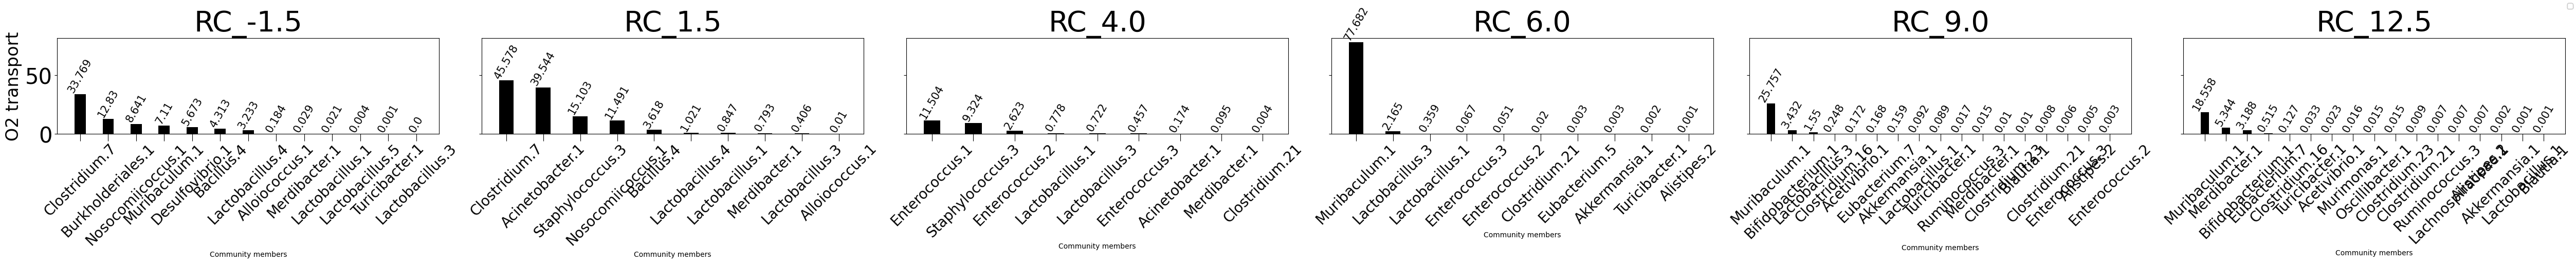

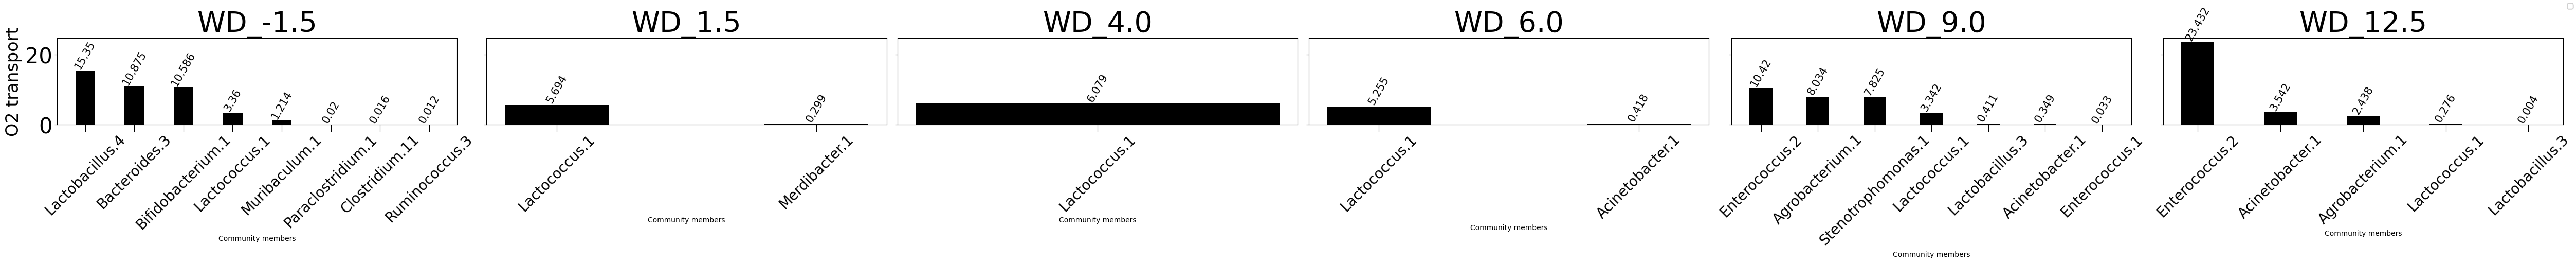

In [10]:
from modelseedpy.core.fbahelper import FBAHelper
from pandas import DataFrame
from numpy import array, arange
from matplotlib import pyplot
from json import load
from os import getcwd


# create the member name-&-abundances hash
community_model_data = load(open("community_model_data.json", 'r'))
new_comData = {}
df_dict = {}
for day_date, content in community_model_data.items():
    day_date = day_date.replace("-ABX", '')
    df_dict[day_date] = {}
    new_comData[day_date] = {}
    for index, name in enumerate(content["names"]):
        new_comData[day_date][str(index+1)] = {"name": name, "abundance": content["abundances"][name]}
        df_dict[day_date][str(index+1)] = content["abundances"][name]

# create the member-O2 transport hash
member_o2transport = {}
type_stats = {"flux": {}, "biomass": {}, "exchange": {}}
for (compartment, diet_day), flux in normalized_o2transports.stack().to_dict().items():
    if flux == 0: continue
    member_o2transport[diet_day] = member_o2transport.get(diet_day, {})
    if FBAHelper.isnumber(compartment) and float(compartment) > 0:
        member_o2transport[diet_day][new_comData[diet_day][compartment]["name"]] = flux
    
for diet_day, content in member_o2transport.items():
    member_o2transport[diet_day] = dict(sorted(content.items(), key=lambda item: item[1], reverse=True))
    
membersO2 = DataFrame(member_o2transport)
membersO2.to_csv("memberO2transports.csv")
        

# visualize the member contributions
def BarChart(member_stats, width=.8, baseDir=None, day_diet = None):
    ## simple carbs
    baseDir = baseDir or getcwd()
    fig, ax = pyplot.subplots(figsize=(30, 6), layout='constrained')
    barss = []
    padding = 1
    numCols = len(member_stats)
    xs = arange(numCols) * (1 + padding)
    barss.append(ax.bar(xs + width, list(member_stats.values()), width, color="black"))
    print(f"{len(barss)} bars")
    ### Add text labels above each bar
    for bars in barss:
        for bar in bars:
            val = bar.get_height()
            if val == 0:   continue
            location = "bottom"
            ax.text(bar.get_x() + bar.get_width()/2, val, f'{abs(round(val, 3))}',
                    ha='center', va=location, fontsize=10, color='black')
                
    ## curtail the figure
    fig.legend(loc='upper right', ncols=2)
    categories = list(member_stats.keys())
    ax.set_xticks(xs + width)  # Center the tick labels
    ax.set_xticklabels(categories, rotation=45)
    ax.tick_params(axis='x', length=10, pad=0)  # Increase tick length and reduce padding
    ax.set_xlabel('Community members')
    ax.set_ylabel('Normalized transport flux of O2 [mmol/(hour * g_biomass)]')
    ax.set_title(f"{day_diet} O2 transport activity")
    
    fig.savefig(baseDir+f"/{day_diet}_member_O2_Fit.png")


def AllBarChart(member_o2transport, diet, width=.8, baseDir=None):
    fig, axs = pyplot.subplots(1, len(member_o2transport), figsize=(50, 5), sharey=True, layout='constrained')
    for index, (diet_day, content) in enumerate(member_o2transport.items()):
        ## simple carbs
        barss = []
        padding = 1
        numCols = len(content)
        xs = arange(numCols) * (1 + padding)
        barss.append(axs[index].bar(xs + width, list(content.values()), width, color="black"))
        print(f"{len(barss)} bars")
        ### Add text labels above each bar
        for bars in barss:
            for bar in bars:
                val = bar.get_height()
                if val == 0:   continue
                location = "bottom"
                axs[index].text(bar.get_x() + bar.get_width()/2, val, f'{abs(round(val, 3))}',
                                ha='center', va=location, rotation=60, fontsize=15, color='black')

        ## curtail the figure
        fig.legend(loc='upper right', ncols=2)
        categories = list(content.keys())
        axs[index].set_xticks(xs + width)  # Center the tick labels
        axs[index].set_xticklabels(categories, rotation=45, fontsize=20)
        axs[index].tick_params(axis='x', length=10, pad=0)  # Increase tick length and reduce padding
        axs[index].set_xlabel('Community members')
        axs[index].set_title(f"{diet_day}", fontsize=40) #" O2 transport activity")
        if index == 0:
            axs[index].set_ylabel('O2 transport', fontsize=24)
            axs[index].tick_params(axis='y', labelsize=30)

    baseDir = baseDir or getcwd()
    fig.savefig(baseDir+f"/{diet}_member_O2_Fit.png")

    
AllBarChart({k:v for k,v in member_o2transport.items() if "RC" in k}, "RC")
AllBarChart({k:v for k,v in member_o2transport.items() if "WD" in k}, "WD")

In [25]:
# mask for inclusion in the 
boolO2transports = normalized_o2transports > 2
display(boolO2transports)

total_o2_consumer_fluxes = total_member_fluxes[boolO2transports].sum()
total_o2_consumer_fluxes

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
1,False,False,False,True,False,False,True,True,True,True,True,False
10,False,True,False,False,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False
12,True,False,False,False,False,False,False,False,False,False,False,False
13,True,True,False,False,False,False,False,False,False,False,False,False
14,False,True,False,False,False,False,False,False,False,False,False,False
15,True,False,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False,False,False,False
17,False,False,False,False,False,False,False,False,False,False,False,False
18,False,False,False,False,False,False,False,False,False,False,False,False


RC_-1.5     773.440412
RC_1.5      907.456325
RC_4.0      648.484086
RC_6.0     1121.229371
RC_9.0      447.027797
RC_12.5     689.760607
WD_-1.5    2080.904108
WD_1.5     2468.344188
WD_4.0     2467.509357
WD_6.0     2521.833577
WD_9.0     1699.911233
WD_12.5    1682.226759
dtype: float64

In [26]:
total_o2_metabolism = total_o2_consumer_fluxes/bulk_total_fluxes
newDict = {}
for label, percent in total_o2_metabolism.items():
    diet, day = label.split("_")
    newDict[diet] = newDict.get(diet, {})
    newDict[diet][day] = percent
newDict

newDF = DataFrame(newDict)
newDF

,RC,WD
-1.5,0.252064,0.586197
1.5,0.307385,0.672879
4.0,0.262778,0.890724
6.0,0.456429,0.636840
9.0,0.155698,0.620982
12.5,0.208300,0.524404


[ 0  2  4  6  8 10]
2


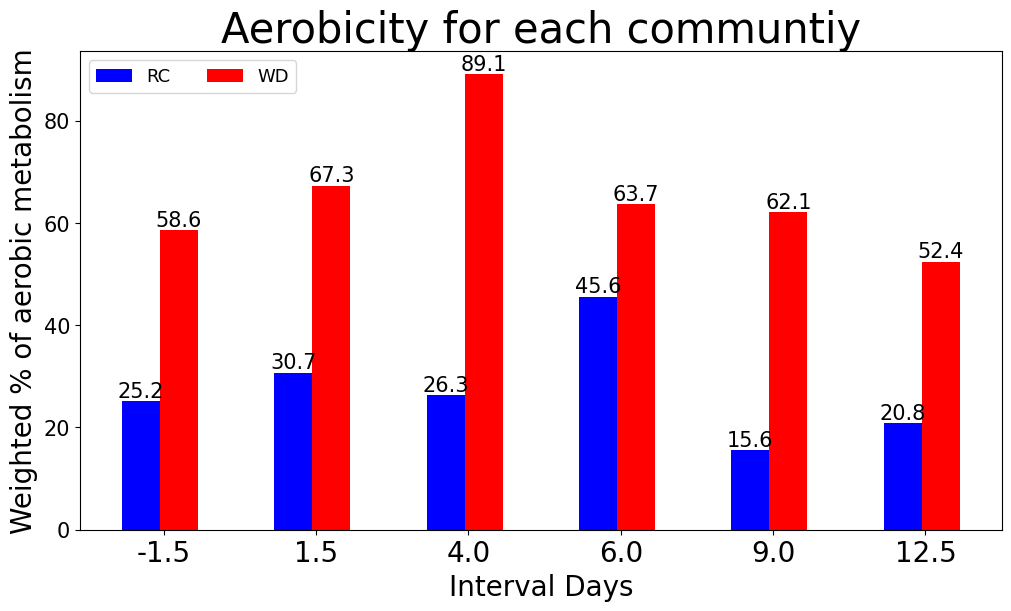

In [27]:
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot
from numpy import arange
from os import getcwd

# Plotting the diverging bar chart
def layeredBarChart(averages, errors=None, baseDir=None):
    baseDir = baseDir or getcwd()
    
    fig, ax = pyplot.subplots(figsize=(10, 6))
    wd_label, rc_label = False, False
    for label, abundance in averages.items():
        # error = errors[day][diet]
        if diet == "WD":
            color = "black"
            bars = ax.bar([day], [abundance], color="blue", label=diet if not wd_label else "",
                          # yerr=error,
                          bottom=[abundance])
            wd_label = True
        else:
            color = "white"
            bars = ax.bar([day], [abundance], color='red', label=diet if not rc_label else "",
                          # yerr=error,
                          bottom=[0])
            rc_label = True
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width()/1.2, abundance, '%.1f' %(abundance), ha='center', va='bottom', fontsize=10, color=color)
    ax.set_xlabel('days')
    ax.set_ylabel('ave. number of consumption+production per ASV')
    ax.set_title("Average metabolic connectivity")
    ax.legend()
    fig.savefig(baseDir+f"/O2fluxes.png")

    
def BarChart(df, width=.5, baseDir=None):
    ## simple carbs
    baseDir = baseDir or getcwd()
    fig, ax = pyplot.subplots(figsize=(10, 6), layout='constrained')
    colors = {"WD": "red", "RC": "blue"}
    barss = []
    numCols = len(df.index)
    padding = 1
    xs = arange(numCols) * (1 + padding)
    print(xs)
    for i, (row_label, row_data) in enumerate(df.T.iterrows()):
        bars = ax.bar(xs+width*i, round(row_data*100, 1), width, label=row_label, color=colors.get(row_label, 'gray'))
        # print(i, row_label, row_data)
        # bars = ax.bar(xs[i] + width*i, round(row_data*100, 1))
        barss.append(bars)
        # break
    # return
    print(len(barss))
    ### Add text labels above each bar
    for bars in barss:
        for bar in bars:
            val = bar.get_height()
            if val == 0:   continue
            # location = "top" if val > 0 else "bottom"
            ax.text(bar.get_x() + bar.get_width()/2, val, f'{abs(val)}', ha='center', va="bottom", fontsize=15, color='black')
                
                
    ### curtail the figure
    categories = list(df.index)
    ax.set_xticks(xs + width*numCols/10)  # Center the tick labels
    ax.set_xticklabels(categories, fontsize=20)
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(loc='upper left', ncols=3, fontsize=13)
    ax.set_xlabel('Interval Days', fontsize=20)
    ax.set_ylabel('Weighted % of aerobic metabolism', fontsize=20)
    ax.set_title(f"Aerobicity for each communtiy", fontsize=30)
    
    fig.savefig(baseDir+f"/O2_barChart_Fit.png")
    
BarChart(newDF)
# layeredBarChart(total_o2_metabolism)

## bar chart with the growth, and total intra- and extra-cellular fluxes of all members

### Perhaps a large column for each day interval and then subcolumns for each member

In [11]:
from modelseedpy.core.fbahelper import FBAHelper

sample_member_stats = {}
type_stats = {"flux": {}, "biomass": {}, "exchange": {}}
total_member_fluxes_dic = total_member_fluxes.to_dict()
for (compartment, diet_day), flux in total_member_fluxes.stack().to_dict().items():
    if flux == 0: continue
    diet, day = diet_day.split("_")
    sample_member_stats[diet] = sample_member_stats.get(diet, {})
    sample_member_stats[diet][day] = sample_member_stats[diet].get(day, {"flux": {}, "biomass": {}})
    # sample_member_stats[diet_day] = sample_member_stats.get(diet_day, {"flux": {}, "biomass": {}})
    # print(compartment, diet_day, flux)
    type_stats["flux"][diet_day] = type_stats["flux"].get(diet_day, {})
    type_stats["biomass"][diet_day] = type_stats["biomass"].get(diet_day, {})
    if FBAHelper.isnumber(compartment) and float(compartment) > 0:
        sample_member_stats[diet][day]["flux"][new_comData[diet_day][compartment]["name"]] = flux
        sample_member_stats[diet][day]["biomass"][new_comData[diet_day][compartment]["name"]
                                                 ] = total_member_fluxes_dic[diet_day][f"bio{int(compartment)+1}"]
        
        type_stats["flux"][diet_day][new_comData[diet_day][compartment]["name"]] = flux
        type_stats["biomass"][diet_day][new_comData[diet_day][compartment]["name"]
                                       ] = total_member_fluxes_dic[diet_day][f"bio{int(compartment)+1}"]
    
from json import dump
dump(sample_member_stats, open("sample_member_stats.json", 'w'), indent=3)
display(sample_member_stats)
print()
display(type_stats)

{'RC': {'-1.5': {'flux': {'Lactobacillus.3': 164.24658027078212,
    'Alloiococcus.1': 64.56620502047848,
    'Lactobacillus.5': 55.15023142081204,
    'Desulfovibrio.1': 39.023210095730924,
    'Burkholderiales.1': 39.75806522152436,
    'Staphylococcus.4': 215.9393782664835,
    'Bacillus.4': 51.64768904904593,
    'Merdibacter.1': 718.3759510920592,
    'Nosocomiicoccus.1': 147.86362177693377,
    'Staphylococcus.3': 428.90699786292896,
    'Turicibacter.1': 95.09106723570542,
    'Lactobacillus.1': 294.81577173858426,
    'Muribaculum.1': 275.23329317383167,
    'Lactobacillus.4': 76.96402890881629,
    'Clostridium.7': 142.95050375264287},
   'biomass': {'Lactobacillus.3': 0.2189954403610428,
    'Alloiococcus.1': 0.1128425714994817,
    'Lactobacillus.5': 0.073533641894416,
    'Desulfovibrio.1': 0.0520309467943079,
    'Burkholderiales.1': 0.0530107536286992,
    'Staphylococcus.4': 0.2879191710219774,
    'Bacillus.4': 0.068863585398728,
    'Merdibacter.1': 0.957834601456074,


{'flux': {'RC_-1.5': {'Lactobacillus.3': 164.24658027078212,
   'Alloiococcus.1': 64.56620502047848,
   'Lactobacillus.5': 55.15023142081204,
   'Desulfovibrio.1': 39.023210095730924,
   'Burkholderiales.1': 39.75806522152436,
   'Staphylococcus.4': 215.9393782664835,
   'Bacillus.4': 51.64768904904593,
   'Merdibacter.1': 718.3759510920592,
   'Nosocomiicoccus.1': 147.86362177693377,
   'Staphylococcus.3': 428.90699786292896,
   'Turicibacter.1': 95.09106723570542,
   'Lactobacillus.1': 294.81577173858426,
   'Muribaculum.1': 275.23329317383167,
   'Lactobacillus.4': 76.96402890881629,
   'Clostridium.7': 142.95050375264287},
  'RC_1.5': {'Lactobacillus.3': 421.1002908042576,
   'Clostridium.7': 141.53386850603968,
   'Alloiococcus.1': 39.60387828429058,
   'Staphylococcus.4': 191.32454346406098,
   'Bacillus.4': 39.48624867242649,
   'Acinetobacter.1': 160.745635965179,
   'Enterococcus.3': 41.090689773958196,
   'Merdibacter.1': 275.50799038017095,
   'Enterococcus.2': 425.794801002

flux {'Merdibacter.1': 718.3759510920592, 'Staphylococcus.3': 428.906997862929, 'Lactobacillus.1': 294.81577173858426, 'Muribaculum.1': 275.23329317383167, 'Staphylococcus.4': 215.9393782664835, 'Lactobacillus.3': 164.24658027078212, 'Nosocomiicoccus.1': 147.86362177693377, 'Clostridium.7': 142.95050375264287, 'Turicibacter.1': 95.09106723570542, 'Lactobacillus.4': 76.96402890881629, 'Alloiococcus.1': 64.56620502047848, 'Lactobacillus.5': 55.15023142081204, 'Bacillus.4': 51.64768904904593, 'Burkholderiales.1': 39.75806522152436, 'Desulfovibrio.1': 39.023210095730924}
biomass {'Merdibacter.1': 0.957834601456074, 'Staphylococcus.3': 0.5718759971505722, 'Lactobacillus.1': 0.3987177167477711, 'Muribaculum.1': 0.3669777242317739, 'Staphylococcus.4': 0.2879191710219774, 'Lactobacillus.3': 0.2189954403610428, 'Nosocomiicoccus.1': 0.3972295703280904, 'Clostridium.7': 0.3791152869146099, 'Turicibacter.1': 0.1267880896476073, 'Lactobacillus.4': 0.1567807251682066, 'Alloiococcus.1': 0.11284257149

/home/afreiburger/env_packages/lib/python3.11/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/afreiburger/env_packages/lib/python3.11/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/afreiburger/env_packages/lib/python3.11/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/afreiburger/env_packages/lib/python3.11/site-packages/sigf

biomass {'Lactobacillus.3': 2.454065158312996, 'Enterococcus.3': 0.7671408898097782, 'Clostridium.21': 0.2653097161038659, 'Muribaculum.1': 0.1883345593695462, 'Akkermansia.1': 0.1733407333171148, 'Lactobacillus.1': 0.1044105158194329, 'Enterococcus.2': 0.0758616594137611, 'Alistipes.2': 0.072463718067751, 'Turicibacter.1': 0.0671323698482062, 'Eubacterium.5': 0.0544547684382482}
1 bars
flux {'Merdibacter.1': 448.3193237432829, 'Turicibacter.1': 377.86334003623665, 'Muribaculum.1': 351.43644026221534, 'Akkermansia.1': 217.8381221782179, 'Lactobacillus.1': 213.33640144651494, 'Lactobacillus.3': 174.18209737895774, 'Clostridium.21': 160.7031184435588, 'Alistipes.2': 157.25389122296892, 'Bifidobacterium.1': 95.59135675904302, 'Enterococcus.2': 76.87258651680293, 'Ruminococcus.3': 70.20523137845176, 'Acetivibrio.1': 58.541619168987616, 'Clostridium.23': 55.48388491225752, 'Eubacterium.7': 52.284625310103806, 'Clostridium.16': 43.621322477511846, 'Enterococcus.3': 42.47229851318693, 'Alisti

/home/afreiburger/env_packages/lib/python3.11/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/afreiburger/env_packages/lib/python3.11/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


flux {'Lactococcus.1': 1885.6001521143148, 'Merdibacter.1': 641.5810905280683, 'Paraclostridium.1': 163.61649069226894, 'Lactobacillus.4': 83.22517023033505, 'Akkermansia.1': 72.2257311554578, 'Bacteroides.3': 65.03137903305715, 'Muribaculum.1': 61.151470892388765, 'Lactobacillus.3': 58.87180656215494, 'Bifidobacterium.1': 47.0474068609676, 'Clostridium.11': 45.40651530981333, 'Ruminococcus.3': 38.12250284981899}
biomass {'Lactococcus.1': 2.515173357029388, 'Merdibacter.1': 0.8554414540374234, 'Paraclostridium.1': 0.2181553209230263, 'Lactobacillus.4': 0.110966893640447, 'Akkermansia.1': 0.0963009748739436, 'Bacteroides.3': 0.0867085053774096, 'Muribaculum.1': 0.0815352945231848, 'Lactobacillus.3': 0.0784957420828731, 'Bifidobacterium.1': 0.0683598884214527, 'Clostridium.11': 0.0605420204130846, 'Ruminococcus.3': 0.0508300037997586}
1 bars
flux {'Lactococcus.1': 2468.3441884774593, 'Merdibacter.1': 792.6750072994757}
biomass {'Lactococcus.1': 3.291125584636618, 'Merdibacter.1': 1.06135

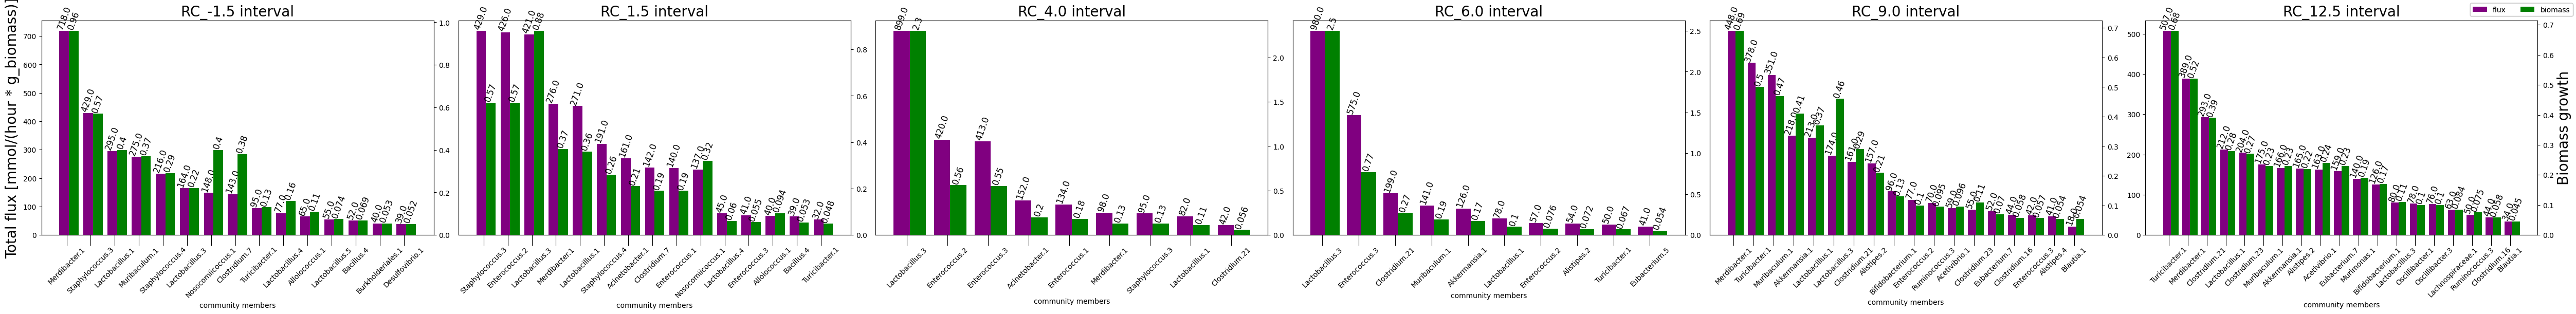

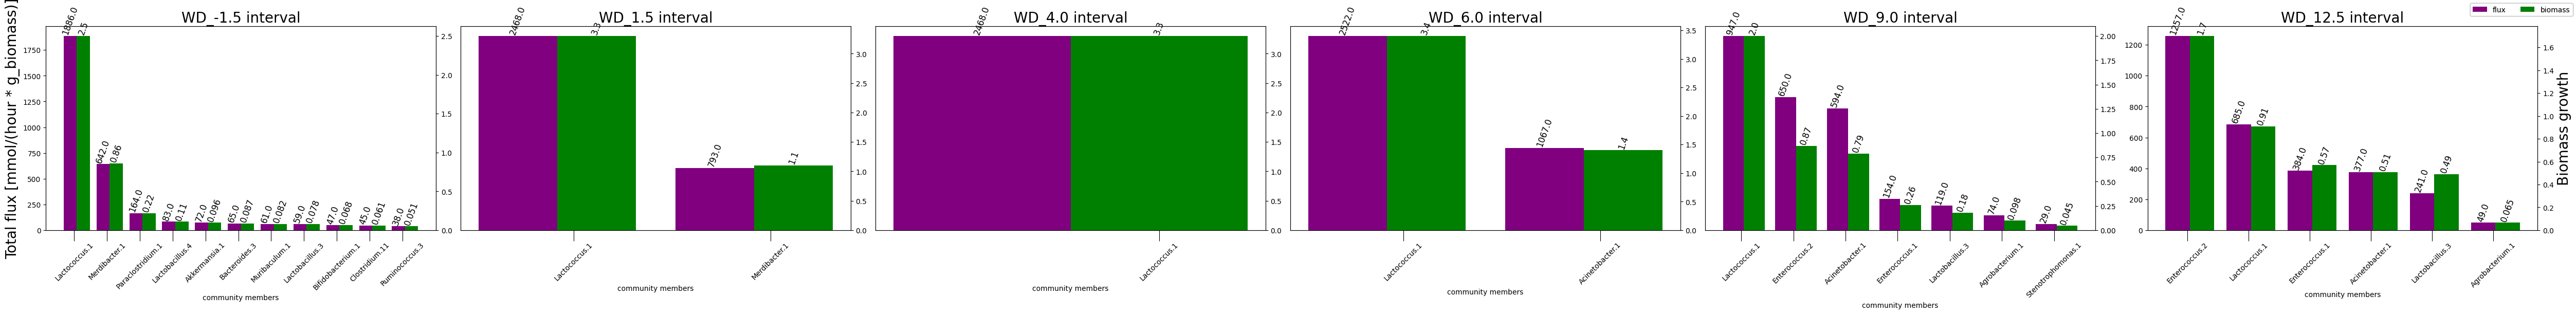

In [34]:
from numpy import array, round
import sigfig

def BarChart(member_stats, diet, width=.8, baseDir=None): #, day_diet = None):
    ## simple carbs
    baseDir = baseDir or getcwd()
    member_stats = member_stats[diet]
    fig, axs = pyplot.subplots(1, len(member_stats), figsize=(50, 6), layout='constrained')
    for index, (day, content) in enumerate(member_stats.items()):
        ax = axs[index]
        ax2 = ax.twinx()
        colors = {"flux": "purple", "biomass": "green"}
        barss, barss2 = [], []
        padding = 1
        numCols = len(content["flux"])
        xs = arange(numCols) * (1 + padding)
        
        # display(content['flux'])
        sorted_flux = dict(sorted(content['flux'].items(), key=lambda item: item[1], reverse=True))
        # display(sorted_flux)
        # Step 2: Reorder "biomass" using the sorted keys
        sorted_biomass = {key: content['biomass'][key] for key in sorted_flux.keys()}
        # display(sorted_biomass)
        
        content = {"flux": sorted_flux, "biomass": sorted_biomass}
        for i, (flux_type, stats) in enumerate(content.items()):
            print(flux_type, stats)
            if flux_type == "flux":
                barss.append(ax.bar(xs + width*i, list(stats.values()), width,
                                    label="flux", color=colors["flux"]))
            elif flux_type == "biomass":
                barss2.append(ax2.bar(xs + width*i, [sigfig.round(x, 2) for x in stats.values()],
                                     width, label="biomass", color=colors["biomass"]))
        print(f"{len(barss)} bars")
        ### Add text labels above each bar
        for bars in barss:
            for bar in bars:
                val = bar.get_height()
                if val == 0:   continue
                location = "bottom"
                ax.text(bar.get_x() + bar.get_width()/2, val, f'{abs(round(val, 0))}',
                        ha='center', rotation=70, va=location, fontsize=12, color='black')
        for bars in barss2:
            for bar in bars:
                val = bar.get_height()
                if val == 0:   continue
                location = "bottom"
                ax2.text(bar.get_x() + bar.get_width()/2, val, f'{sigfig.round(val, 2)}',
                        ha='center', rotation=70, va=location, fontsize=12, color='black')

        ## curtail the figure
        ### define the legend
        handles1, labels1 = ax.get_legend_handles_labels()  # Get handles and labels from ax1
        handles2, labels2 = ax2.get_legend_handles_labels()  # Get handles and labels from ax2
        handles = handles1 + handles2  # Combine handles
        labels = labels1 + labels2  # Combine labels
        fig.legend(handles, labels, loc='upper right', ncols=2)

        ### update axes
        categories = list(content["flux"].keys())
        ax.set_xticks(xs + width/numCols**.5)  # Center the tick labels
        ax.set_xticklabels(categories, rotation=45)
        ax.tick_params(axis='x', length=15, pad=0)  # Increase tick length and reduce padding
        ax.set_xlabel("community members")
        if index == 0:  # Top subplot
            ax.set_ylabel('Total flux [mmol/(hour * g_biomass)]', fontsize=20)
        elif index == len(axs) - 1:  # Bottom subplot
            ax2.set_ylabel('Biomass growth', fontsize=20)
        else:
            ax.yaxis.set_visible(False)
        
        ax.set_title(f"{diet}_{day} interval", fontsize=20)
    
    fig.savefig(baseDir+f"/{diet}_member_activity_Fit.png")

BarChart(sample_member_stats, diet="RC")
BarChart(sample_member_stats, diet="WD")

# Correlation of metabolomics and community exchanges

In [31]:
from modelseedpy.biochem import from_local

msdb = from_local("../../ModelSEEDDatabase")

In [32]:
newIDname = {}
for cpd in msdb.compounds:
    newIDname[cpd.id] = cpd.name

from json import dump
dump(newIDname, open("IDname.json", 'w'), indent=3)

In [9]:
from pandas import read_csv
from numpy import select
from json import load

exchanges = fluxes[fluxes.index.str.contains("EX_")]
exchanges.index.name = "exchange"
exchanges.index = [ex.replace("EX_", '').replace("_e0", '') for ex in exchanges.index]

display(exchanges)


# binarize the exchanges
threshold = 1e-6
conditions = [
    exchanges > threshold,
    (exchanges >= -threshold) & (exchanges <= threshold),
    exchanges < -threshold]
choices = [1, 0, -1]
df_thresholded = select(conditions, choices, default=0)
binarized_exchanges = DataFrame(df_thresholded, columns=exchanges.columns, index=exchanges.index)
display(binarized_exchanges)

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
cpd01080,0.000000,-0.042529,0.000000,-0.000000,0.000000,0.000000,-0.013564,-0.000000,2.730208,0.000000,0.000000,0.000000
cpd00307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
cpd10515,-0.092259,-0.071747,-0.086449,-0.096450,-0.085958,-0.082535,-0.079232,-0.115830,-0.065666,-0.098620,-0.076675,-0.100375
cpd00084,-1.664072,0.073078,-0.179967,0.332965,0.450025,0.279140,-0.406653,-0.310475,-1.529060,-0.164467,-1.048693,-0.451199
cpd00011,0.047835,0.006679,0.454062,2.484064,0.071113,0.237542,0.117811,0.000000,-0.000000,0.000000,0.000000,0.437073
...,...,...,...,...,...,...,...,...,...,...,...,...
cpd00242,NaN,NaN,NaN,NaN,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpd00079,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpd01502,NaN,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN
cpd01150,NaN,NaN,NaN,NaN,NaN,NaN,-0.000000,NaN,NaN,NaN,NaN,NaN


,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
cpd01080,0,-1,0,0,0,0,-1,0,1,0,0,0
cpd00307,0,0,0,0,0,0,0,0,0,0,0,0
cpd10515,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
cpd00084,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1
cpd00011,1,1,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
cpd00242,0,0,0,0,0,0,0,0,0,0,0,0
cpd00079,0,0,0,0,0,0,0,0,0,0,0,0
cpd01502,0,0,0,0,0,0,0,0,0,0,0,0
cpd01150,0,0,0,0,0,0,0,0,0,0,0,0


## load and process the metabolomics data

In [10]:
from json import load, dump
from pandas import DataFrame, read_csv
from numpy import select

MSID_BiGG_mapping = load(open("../../CommScores/commscores/data/BiGG_to_MSID.json", 'r'))
IDnames = {v:k for k,v in load(open("../../CommScores/commscores/data/compoundNames.json", 'r')).items()}

# loading and organizing the metabolomics data
metabolomics = read_csv("complete_mapping_metabolomics.csv").set_index("SampleName").drop("Unnamed: 0", axis=1)
newCols = []
for c in metabolomics.columns:
    cpdID = MSID_BiGG_mapping[c]
    newCols.append(cpdID)
metabolomics.columns = newCols
metabolomics.fillna(0, inplace=True)
metabolomics.drop([x for x in ["RC_001", "WD_001"] if x in metabolomics.index], axis=0, inplace=True)

# parse day and diet metadata labels
# metaData = read_csv("../../../ABX_mouse_gut/data/metabolomics_meta.csv").set_index("Sample.ID")
metaData = read_csv("../../ABX_mouse_gut/data/metabolomics/metabolomics_meta.csv").set_index("Sample.ID")
metaData.drop(["RC_001", "WD_001"], inplace=True)
trialDay = dict(zip(metaData.index.to_numpy(), metaData["Rec_day_adj"].to_numpy()))
trialDiet = dict(zip(metaData.index.to_numpy(), [x.split("-")[0] for x in metaData["Treatment"].to_numpy()]))

# add the trial metadata and aggregate results by these organizations
metabolomics["Rec_day_adj"] = [str(trialDay[trial]) for trial in metabolomics.index]
metabolomics["diet"] = [trialDiet[trial] for trial in metabolomics.index]
metabolomics["diet_day"] = metabolomics["diet"] + "_" + metabolomics["Rec_day_adj"]
metabolomics = metabolomics.groupby(['diet_day']).sum()
metabolomics.drop(["diet", "Rec_day_adj"], axis=1, inplace=True)
metabolomics = metabolomics.T



## log2 between adjacent diet+day points for comparison with the predicted values
from numpy import log2

RCintervals = [["RC_-3", "RC_0"], ["RC_0", "RC_3"], ["RC_3", "RC_5"], ["RC_5", "RC_7"], ["RC_7", "RC_11"], ["RC_11", "RC_14"]]
WDintervals = [["WD_-3", "WD_0"], ["WD_0", "WD_7"], ["WD_7", "WD_11"], ["WD_11", "WD_14"]]

for cols in RCintervals:
    day1, day2 = cols[0].split("_")[-1], cols[1].split("_")[-1]
    aveDay = (int(day1)+int(day2))/2
    metabolomics[f"RC_{aveDay}"] = [max([-3, min([3, x])]) for x in log2(metabolomics[cols[1]]/metabolomics[cols[0]])]
    metabolomics.drop(cols[0], axis=1, inplace=True)

for cols in WDintervals:
    day1, day2 = cols[0].split("_")[-1], cols[1].split("_")[-1]
    aveDay = (int(day1)+int(day2))/2
    metabolomics[f"WD_{aveDay}"] = [max([-3, min([3, x])]) for x in log2(metabolomics[cols[1]]/metabolomics[cols[0]])]
    metabolomics.drop(cols[0], axis=1, inplace=True)

metabolomics["WD_1.5"] = metabolomics["WD_3.5"]
metabolomics["WD_4"] = metabolomics["WD_3.5"]
metabolomics["WD_6"] = metabolomics["WD_3.5"]
metabolomics.drop([col for col in metabolomics.columns if any([x in col for x in ["3.5", "14", "28"]])], axis=1, inplace=True)
diet_days = metabolomics.columns
print(metabolomics.index)
metabolomics.T.to_csv("regenerated_log2_metabolomics.csv")
# display(metabolomics)
dump(metabolomics.T.to_dict(), open("regenerated_log2_metabolomics.json", 'w'), indent=3)

# binarize the exchanges
# Apply the threshold criteria
threshold = 1
conditions = [
    metabolomics > threshold,
    (metabolomics >= -threshold) & (metabolomics <= threshold),
    metabolomics < -threshold]
choices = [1, 0, -1]
df_thresholded = select(conditions, choices, default=0)
binarized_metabolomics = DataFrame(df_thresholded, columns=metabolomics.columns, index=metabolomics.index)

Index(['cpd35610', 'cpd01242', 'cpd01293', 'cpd00035', 'cpd01055', 'cpd00224',
       'cpd00132', 'cpd00041', 'cpd00158', 'cpd00526', 'cpd00137', 'cpd00084',
       'cpd01107', 'cpd02733', 'cpd01741', 'cpd01171', 'cpd00082', 'cpd00751',
       'cpd00106', 'cpd00108', 'cpd00027', 'cpd00023', 'cpd00033', 'cpd01113',
       'cpd00119', 'cpd00359', 'cpd00322', 'cpd00107', 'cpd01122', 'cpd02475',
       'cpd00039', 'cpd00130', 'cpd03198', 'cpd00060', 'cpd03847', 'cpd00122',
       'cpd00218', 'cpd03846', 'cpd00064', 'cpd00214', 'cpd00066', 'cpd07053',
       'cpd00129', 'cpd00020', 'cpd00382', 'cpd00396', 'cpd00105', 'cpd00550',
       'cpd00036', 'cpd00076', 'cpd00161', 'cpd00069', 'cpd04945', 'cpd00597',
       'cpd00156', 'cpd00024', 'cpd00536', 'cpd00392', 'cpd00121', 'cpd00851'],
      dtype='object')


/Users/afreiburger/test/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/afreiburger/test/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/afreiburger/test/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/afreiburger/test/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/afreiburger/test/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/afreiburger/test/lib/python3.12/site-packages/pandas/core/

# correlations

In [47]:
from sklearn.linear_model import LinearRegression
from numpy import corrcoef
from numpy import array, mean

overlapping_exchanges = list(set(metabolomics.index) & set(exchanges.index))
print(overlapping_exchanges)
correlations = {}
for index, row in metabolomics.loc[overlapping_exchanges].iterrows():
    xs, ys = array(exchanges.loc[index].tolist()).reshape(-1, 1), array(row.tolist())
    model = LinearRegression()
    model.fit(xs, ys)
    correlations[index] = model.score(xs, ys)
    # correlations[index] = corrcoef(xs, ys)[0, 1]
    

correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
print(mean(list(correlations.values())))
display(correlations)
from json import dump
dump(correlations, open("metabolomics_correlations.json", 'w'), indent=3)

# print()

# overlapping_exchanges = list(set(binarized_metabolomics.index) & set(binarized_exchanges.index))
# print(overlapping_exchanges)
# correlations = {}
# for index, row in binarized_metabolomics.loc[overlapping_exchanges].iterrows():
#     newMetabolomics = []
#     newExchanges = array(exchanges.loc[index].tolist())
#     # remove_indices = []
#     # if len(remove_indices) == len(row):  continue
    
#     xs, ys = array(newExchanges).reshape(-1, 1), array(newMetabolomics)
    
#     model = LinearRegression()
#     model.fit(xs, ys)
#     correlations[index] = model.score(xs, ys)

# correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
# print(mean(list(correlations.values())))
# display(correlations)

# from json import dump
# dump(correlations, open("binarized_metabolomics_correlations.json", 'w'), indent=3)

['cpd00107', 'cpd00105', 'cpd00382', 'cpd00396', 'cpd00526', 'cpd00066', 'cpd00084', 'cpd03847', 'cpd00158', 'cpd00035', 'cpd00121', 'cpd00161', 'cpd00024', 'cpd00108', 'cpd01107', 'cpd02733', 'cpd00130', 'cpd01171', 'cpd00082', 'cpd01293', 'cpd00214', 'cpd03846', 'cpd00041', 'cpd00106', 'cpd00033', 'cpd00550', 'cpd00224', 'cpd00039', 'cpd00751', 'cpd00020', 'cpd00076', 'cpd01055', 'cpd00851', 'cpd00060', 'cpd00023', 'cpd00122', 'cpd00036', 'cpd00064', 'cpd00536', 'cpd00322', 'cpd01242', 'cpd00129', 'cpd00137', 'cpd03198', 'cpd00132', 'cpd00119', 'cpd00069', 'cpd00156', 'cpd00218', 'cpd00027']
0.12320064626238164


{'cpd00119': 1.0,
 'cpd00224': 0.4498998593503326,
 'cpd00218': 0.31424591794183376,
 'cpd00035': 0.2878817166310176,
 'cpd00036': 0.27601797576118914,
 'cpd00851': 0.26295152390017984,
 'cpd00526': 0.24965659620210412,
 'cpd00020': 0.23423058395033847,
 'cpd00023': 0.218428373419718,
 'cpd03847': 0.18204053701018763,
 'cpd00060': 0.17265853030852996,
 'cpd00130': 0.16937542356329194,
 'cpd00132': 0.16864793002221212,
 'cpd00076': 0.16013216648487472,
 'cpd00161': 0.15567717007813098,
 'cpd02733': 0.1367487347128723,
 'cpd03846': 0.13094070513136502,
 'cpd00105': 0.12754767202838024,
 'cpd00027': 0.11900353595701185,
 'cpd00082': 0.11365760617584542,
 'cpd00751': 0.10995931905823442,
 'cpd00156': 0.10837921152615371,
 'cpd00122': 0.0980849993649563,
 'cpd00322': 0.0919105771507196,
 'cpd00536': 0.09139066058283618,
 'cpd01242': 0.08219553554952685,
 'cpd00033': 0.0758966862549344,
 'cpd00039': 0.07369416695683662,
 'cpd00214': 0.05883461354723496,
 'cpd00084': 0.056365186217290364,
 'c

## categorical correlations

### Categories versus exchanges

In [48]:
from json import load
from numpy import array, save

simpleCarbons = array([("cpd00036", "Succinate"), ("cpd00137", "Citrate"), ("cpd00130", "L-Malate"), ("cpd00020", "Pyruvate")])
save("../../CommScores/commscores/data/categories/simpleCarbons.npy", simpleCarbons)

with open("metabolomics_categories.json", 'r') as jsonIn:
    compounds = load(jsonIn)
    
with open("../../CommScores/commscores/data/compoundNames.json", 'r') as jsonIn:
    cpdNames = load(jsonIn)
    
IDnames = {ID:name for name,ID in cpdNames.items()}
# display(IDnames)
    
cpdCategory = {ele:k for k,v in compounds.items() for ele in v}
# cpdCategory

In [75]:
from numpy import load

scfa = dict(load("../../CommScores/commscores/data/categories/scfa.npy"))
vitamins = dict(load("../../CommScores/commscores/data/categories/vitamins.npy"))
aminoAcids = dict(load("../../CommScores/commscores/data/categories/allAAs.npy"))
sugars = dict(load("../../CommScores/commscores/data/categories/sugars.npy"))
complex_sugars = dict(load("../../CommScores/commscores/data/categories/complex_sugars.npy"))
fatty_acids = dict(load("../../CommScores/commscores/data/categories/fattyAcids.npy"))
simple = dict(load("../../CommScores/commscores/data/categories/simpleCarbons.npy"))
    
cpdCategory = {}
for m in scfa:
    cpdCategory[m] = "SCFA"
for m in vitamins:
    cpdCategory[m] = "vitamin"
for m in aminoAcids:
    cpdCategory[m] = "AA"
for m in sugars:
    cpdCategory[m] = "sugar"
for m in complex_sugars:
    cpdCategory[m] = "complex_sugar"
for m in fatty_acids:
    cpdCategory[m] = "FA"
for m in simple:
    cpdCategory[m] = "simple_carbon"



## categorized metabolomics
categorized_metabolomics = metabolomics.copy()
categorized_metabolomics.index.name = "category"
categorized_metabolomics.index = [cpdCategory.get(i, "other") for i in categorized_metabolomics.index]
categorized_metabolomics = categorized_metabolomics.groupby(level=0).sum()
# display(categorized_metabolomics)

## categorized flux exchanges
categorized_exchanges = exchanges.copy()
# categorized_exchanges.index.name = "category"
categorized_exchanges.index = [cpdCategory.get(i, "other") for i in categorized_exchanges.index]
categorized_exchanges = categorized_exchanges.groupby(level=0).sum()
display(categorized_exchanges)

## categorized total fluxes
categorized_total_fluxes = total_fluxes.copy()
categorized_total_fluxes.index = [cpdCategory.get(i, "other") for i in categorized_total_fluxes.index]
categorized_total_fluxes = categorized_total_fluxes.groupby(level=0).sum()
display(categorized_total_fluxes)

FileNotFoundError: [Errno 2] No such file or directory: '../../CommScores/commscores/data/categories/allAAs.npy'

In [74]:
from sklearn.linear_model import LinearRegression
from numpy import corrcoef
from numpy import array, mean

categorized_metabolomics.to_csv("categorized_metabolomics.csv")
categorized_exchanges.to_csv("categorized_exchanges.csv")

overlapping_exchanges = list(set(categorized_metabolomics.index) & set(categorized_exchanges.index))
print(overlapping_exchanges)
correlations = {}
for index, row in categorized_metabolomics.loc[overlapping_exchanges].iterrows():
    xs, ys = array(categorized_exchanges.loc[index].tolist()).reshape(-1, 1), array(row.tolist())
    model = LinearRegression()
    model.fit(xs, ys)
    correlations[index] = model.score(xs, ys)
    # correlations[index] = corrcoef(xs, ys)[0, 1]
    

correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
print(mean(list(correlations.values())))
display(correlations)
from json import dump
dump(correlations, open("categorized_correlations.json", 'w'), indent=3)

NameError: name 'categorized_metabolomics' is not defined

### categories vs total flux

In [1]:
from cobra.io import load_json_model
from glob import glob

# for mdl in glob("RC-ABX_*.json"):
#     model = load_json_model(mdl)
#     print(model.metabolites["cpd35610"])
    


model = load_json_model("RC-ABX_-1.5.json")

# for mdl in glob("WD-ABX_*.json"):
    

KeyError: 'cpd35610'

In [53]:
totalCpdFluxes = {}
cpdRxns = {}
missingCpds = set()
for cpd in metabolomics.index:
    totalCpdFluxes[cpd] = 0
    for c in model.compartments:
        if "c" not in c:   continue
        cpdID = f"{cpd}_{c}"
        modelMets = [m.id for m in model.metabolites]
        if cpdID not in modelMets:  missingCpds.add(cpd) ; continue
        met = model.metabolites.get_by_id(cpdID)
        if len(met.reactions) == 0:  continue
        # display([rxn.metabolites for rxn in met.reactions])
        # for rxn in met.reactions:
        #     print(rxn.reaction)
        cpdRxns[cpd] = cpdRxns.get(cpd, {"consuming": [], "producing": []})
        totalCpdFluxes[cpdID] = sum([abs(rxn.metabolites[met]) for rxn in met.reactions])
        cpdRxns[cpd]["consuming"].extend([rxn for rxn in met.reactions if rxn.metabolites[met] < 1])
        cpdRxns[cpd]["producing"].extend([rxn for rxn in met.reactions if rxn.metabolites[met] > 1])

missingCpds -= set(list(cpdRxns.keys()))
totalCpdFluxes = dict(sorted(totalCpdFluxes.items(), key=lambda item: item[1], reverse=True))

In [54]:
missingCpds

{'cpd00392',
 'cpd00526',
 'cpd00536',
 'cpd00597',
 'cpd01113',
 'cpd01122',
 'cpd01171',
 'cpd02475',
 'cpd02733',
 'cpd04945',
 'cpd07053',
 'cpd35610'}

In [72]:
from pandas import DataFrame

# create the total CPD fluxes DataFrame
total_rxn_fluxes = fluxes.copy()
total_rxn_fluxes.drop(["max_growth", "carbon_uptake",
                   "minimum probability objective"], inplace=True)
total_rxn_fluxes.drop([r for r in total_rxn_fluxes.index if any([x in r for x in ["bio", "SK_"]])], inplace=True)
total_rxn_fluxes.index = [x.split("_")[0] for x in total_rxn_fluxes.index]
total_rxn_fluxes = total_rxn_fluxes.groupby(level=0).sum()
display(total_rxn_fluxes.head())

# Create a hash of total flux for each metabolomics metabolite of interest
# cpdRxns = {}
# for cpd in metabolomics.index:
#     print(cpd)
#     cpdRxns[cpd] = {"consuming": [], "producing": []}
#     for rxn in cpdRxns[cpd]:
        # print(rxn)
        # print(rxn.metabolites[cpd])
        # if rxn.metabolites[cpd] > 0:    cpdRxns[cpd]["producing"].append(rxn)
        # elif rxn.metabolites[cpd] < 0:  cpdRxns[cpd]["consuming"].append(rxn)
    
cpdFluxes = {}
for cpd, rxnContent in cpdRxns.items():
    allRxns = rxnContent["consuming"] + rxnContent["producing"]
    allRxnsIds = [rxn.id.split("_")[0] for rxn in allRxns if rxn.id.split("_")[0] in total_rxn_fluxes.index]
#     print(allRxns)
    theseRxnsFluxes = total_rxn_fluxes.loc[allRxnsIds]
    cpdFluxes[cpd] = theseRxnsFluxes.sum()

totalCpdFluxes = DataFrame(cpdFluxes).T

,RC_-1.5,RC_1.5,RC_4.0,RC_6.0,RC_9.0,RC_12.5,WD_-1.5,WD_1.5,WD_4.0,WD_6.0,WD_9.0,WD_12.5
EX,-14.855938,-44.468089,1.143212,-8.165923,35.438292,23.946314,-6.094864,6.033556,38.041177,-84.134857,-16.988147,-17.821850
flux fitting objective,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rxn00001,0.494471,0.419399,0.000000,0.000000,0.088803,0.000000,3.445122,8.188468,10.981885,7.516822,2.957131,3.065058
rxn00002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rxn00003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [73]:
from sklearn.linear_model import LinearRegression
from numpy import corrcoef
from numpy import array, mean

overlapping_exchanges = list(set(metabolomics.index) & set(totalCpdFluxes.index))
print(overlapping_exchanges)
correlations = {}
for index, row in metabolomics.loc[overlapping_exchanges].iterrows():
    xs, ys = array(totalCpdFluxes.loc[index].tolist()).reshape(-1, 1), array(row.tolist())
    model = LinearRegression()
    model.fit(xs, ys)
    correlations[index] = model.score(xs, ys)
    # correlations[index] = corrcoef(xs, ys)[0, 1]
    

correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
print(mean(list(correlations.values())))
display(correlations)
from json import dump
dump(correlations, open("totalCpdFlux_correlations.json", 'w'), indent=3)

['cpd01055', 'cpd00069', 'cpd00076', 'cpd00158', 'cpd00130', 'cpd03198', 'cpd00105', 'cpd00024', 'cpd00851', 'cpd00108', 'cpd00027', 'cpd00224', 'cpd00066', 'cpd00060', 'cpd00382', 'cpd00020', 'cpd00137', 'cpd00359', 'cpd00751', 'cpd00156', 'cpd00161', 'cpd03846', 'cpd00132', 'cpd00023', 'cpd00082', 'cpd00039', 'cpd00214', 'cpd01242', 'cpd01293', 'cpd00035', 'cpd03847', 'cpd00218', 'cpd00119', 'cpd00121', 'cpd00550', 'cpd01107', 'cpd00033', 'cpd00122', 'cpd00322', 'cpd00129', 'cpd00041', 'cpd00036', 'cpd00106', 'cpd00396', 'cpd00084', 'cpd00064', 'cpd01741', 'cpd00107']
0.0857686507128483


{'cpd00119': 1.0,
 'cpd00214': 0.505355866077485,
 'cpd00084': 0.327013346966295,
 'cpd00224': 0.30578765495219695,
 'cpd00106': 0.18914693613565592,
 'cpd00156': 0.18350432831684393,
 'cpd00020': 0.15908100670156022,
 'cpd00751': 0.10995931905823442,
 'cpd00082': 0.09710262882770015,
 'cpd03847': 0.08268767436240032,
 'cpd00322': 0.0787964939846113,
 'cpd00396': 0.07850228765643641,
 'cpd00137': 0.07704726292536657,
 'cpd00024': 0.07497964446627192,
 'cpd00060': 0.07321599387330224,
 'cpd01107': 0.07045779175930056,
 'cpd00132': 0.06680771078257064,
 'cpd00550': 0.06547538820639875,
 'cpd00158': 0.06400602232552943,
 'cpd00130': 0.05753210390213381,
 'cpd00036': 0.05623049847228512,
 'cpd00105': 0.05348797264961347,
 'cpd00027': 0.05022151264624741,
 'cpd00066': 0.04707568141562124,
 'cpd00069': 0.04506072284786444,
 'cpd00023': 0.04341097193146659,
 'cpd00035': 0.02069168959090595,
 'cpd00039': 0.020294237611944377,
 'cpd00107': 0.019040156108772965,
 'cpd00064': 0.01848889329397574,

### categorical log2 change vs uptake flux

In [ ]:
categorized_metabolomics

### cpd specific abundance vs total flux

In [ ]:
from sklearn.linear_model import LinearRegression
from numpy import corrcoef
from numpy import array, mean

overlapping_cpds = list(set(metabolomics.index) & set(total.index))
print(overlapping_exchanges)
correlations = {}
for index, row in categorized_metabolomics.loc[overlapping_exchanges].iterrows():
    xs, ys = array(categorized_exchanges.loc[index].tolist()).reshape(-1, 1), array(row.tolist())
    model = LinearRegression()
    model.fit(xs, ys)
    correlations[index] = model.score(xs, ys)
    # correlations[index] = corrcoef(xs, ys)[0, 1]
    

correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
print(mean(list(correlations.values())))
display(correlations)
from json import dump
dump(correlations, open("categorized_correlations.json", 'w'), indent=3)

### cpd specific log2 change vs uptake flux

### matching IDs between the simulation fluxes and the metabolomics data

The L-Methionine has not been mapped, and is skipped
The D-Glucose has not been mapped, and is skipped
The Dulcose has not been mapped, and is skipped
The N-Acetyl-D-glucosamine has not been mapped, and is skipped
The D-Ribose has not been mapped, and is skipped
The CELB has not been mapped, and is skipped


/tmp/ipykernel_623740/1164464659.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pyplot.figure()


The Acetate has not been mapped, and is skipped
The Thyminose has not been mapped, and is skipped
The L-Fucose has not been mapped, and is skipped
The L-Rhamnose has not been mapped, and is skipped


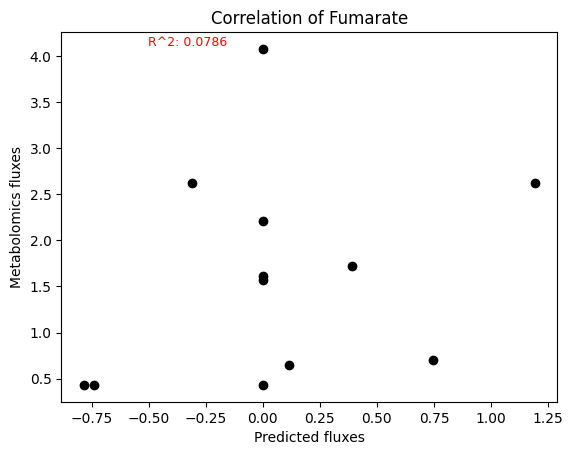

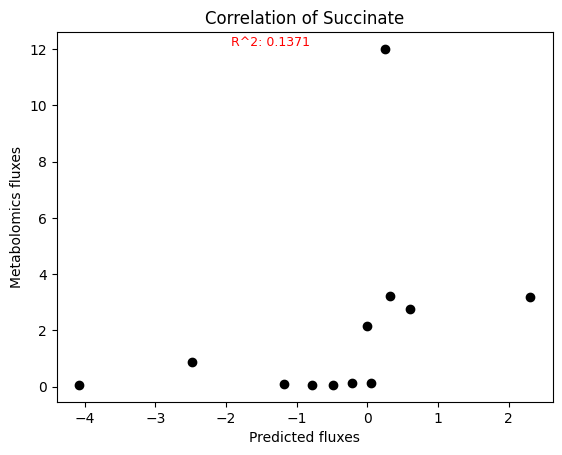

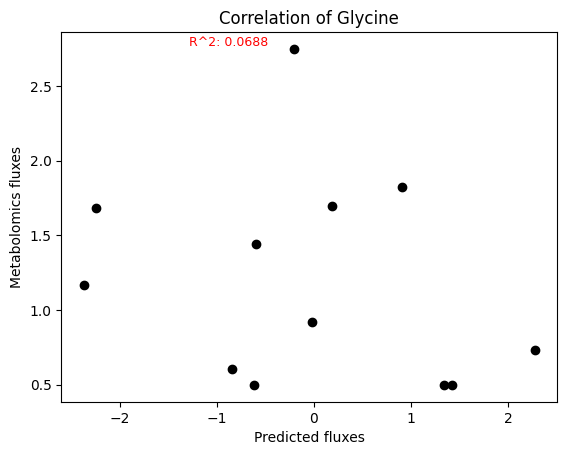

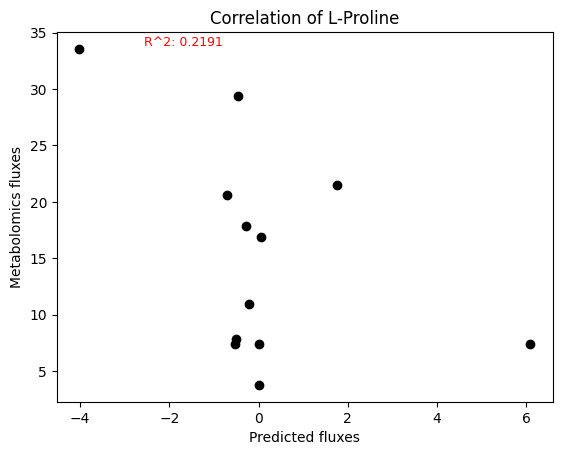

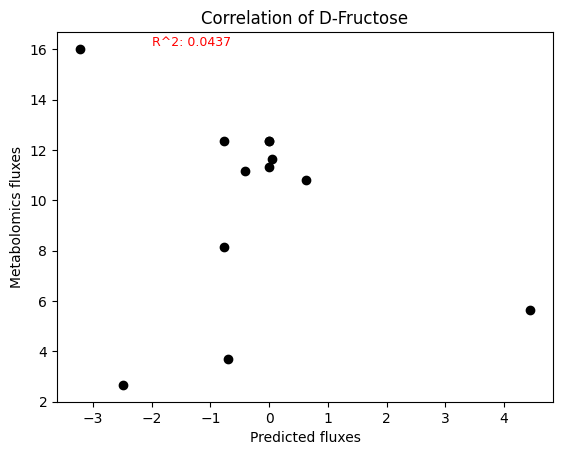

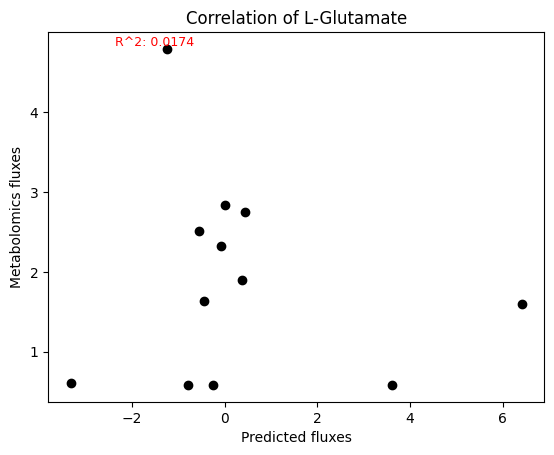

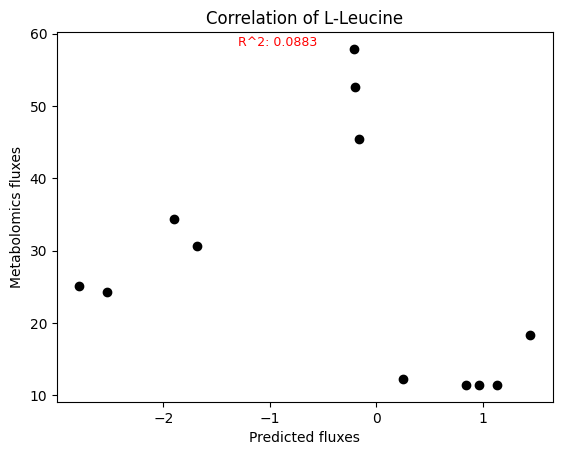

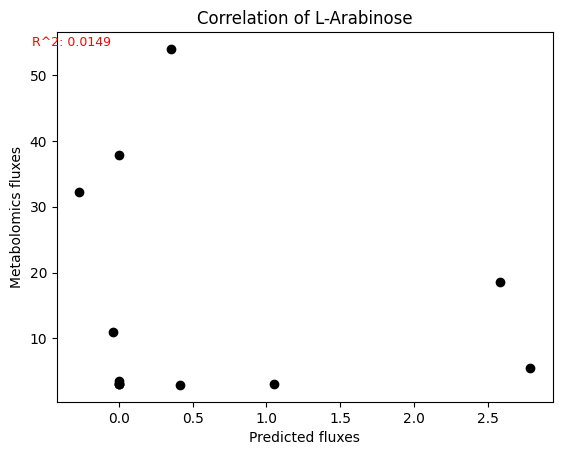

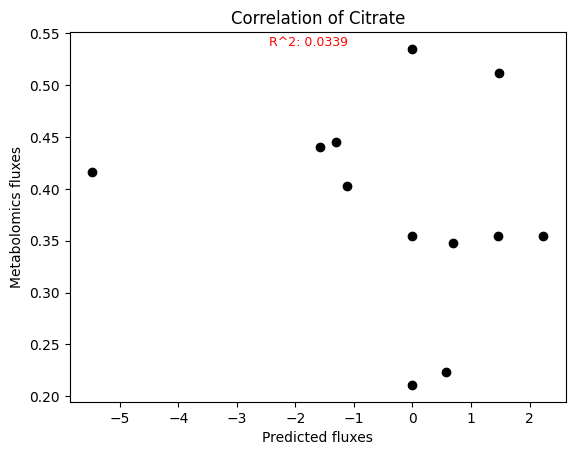

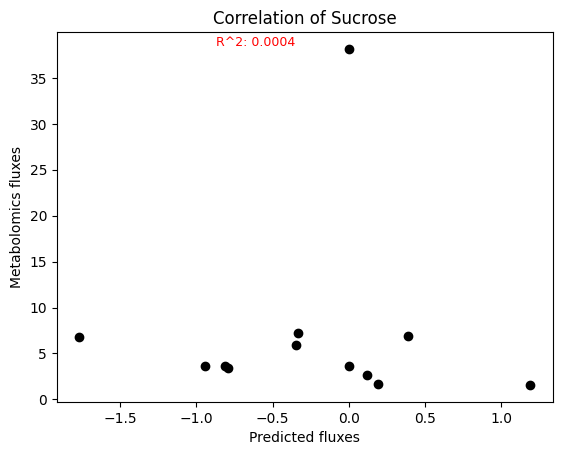

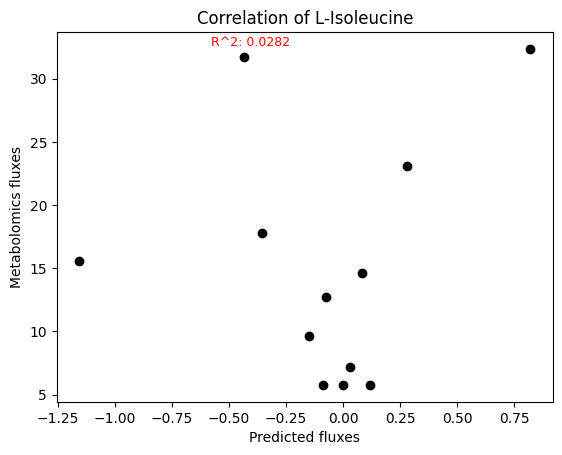

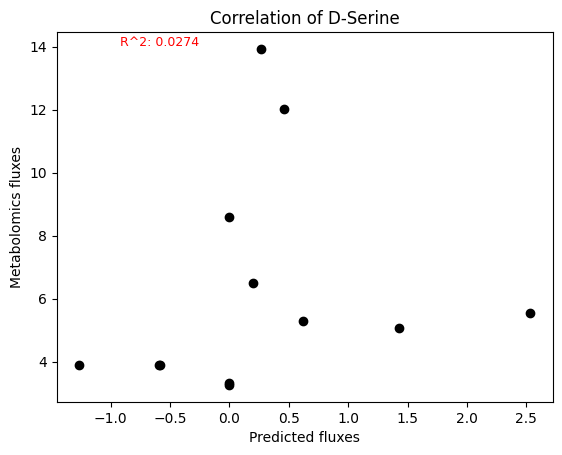

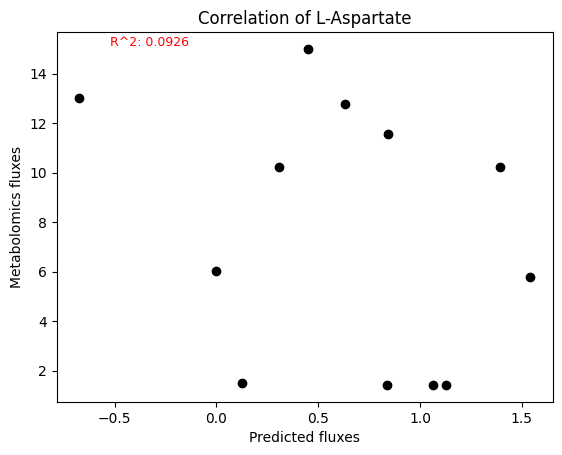

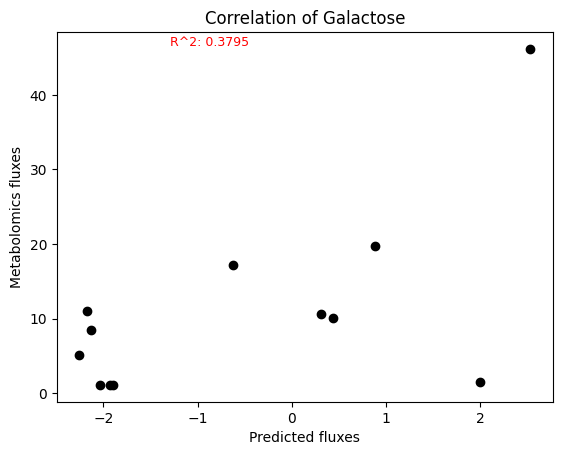

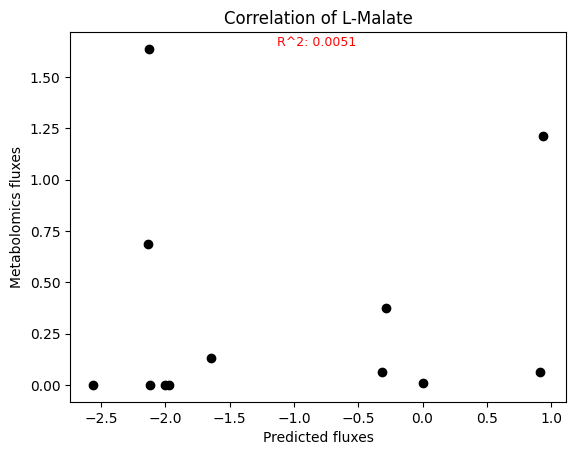

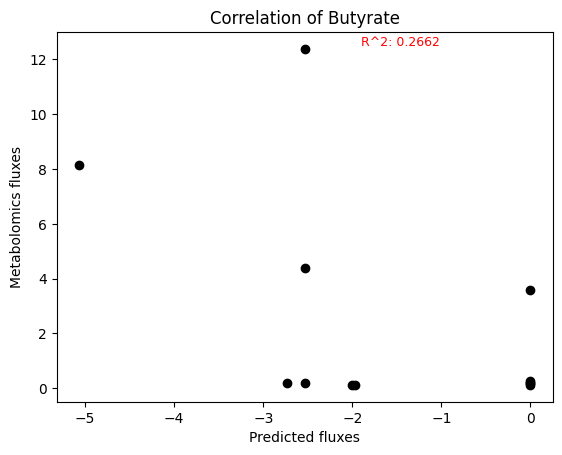

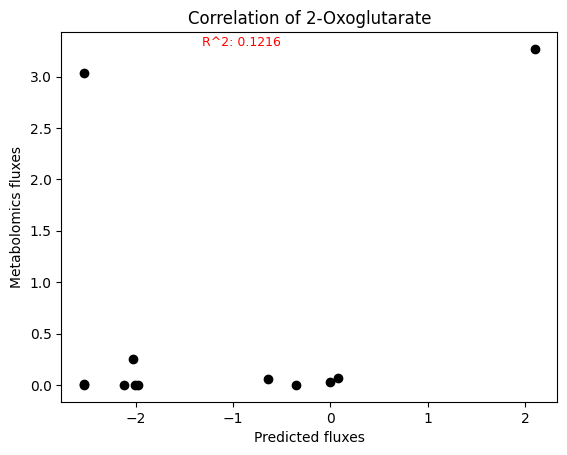

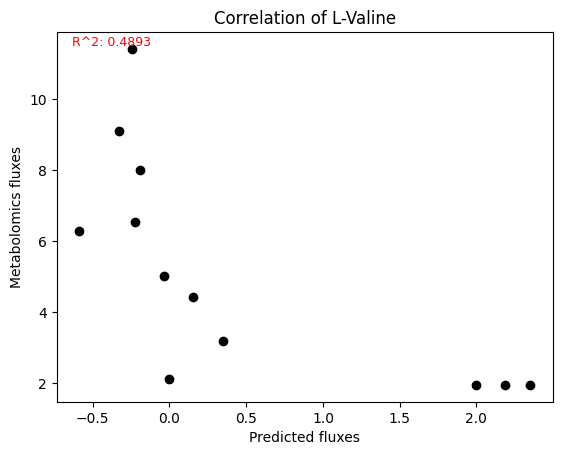

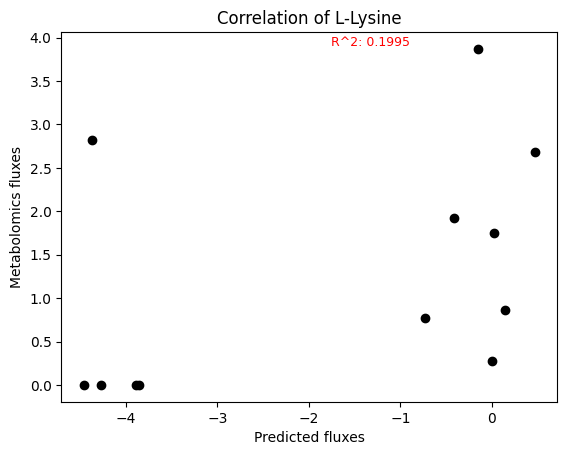

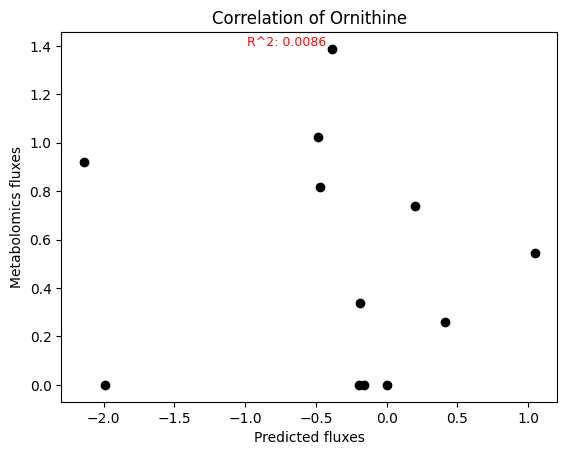

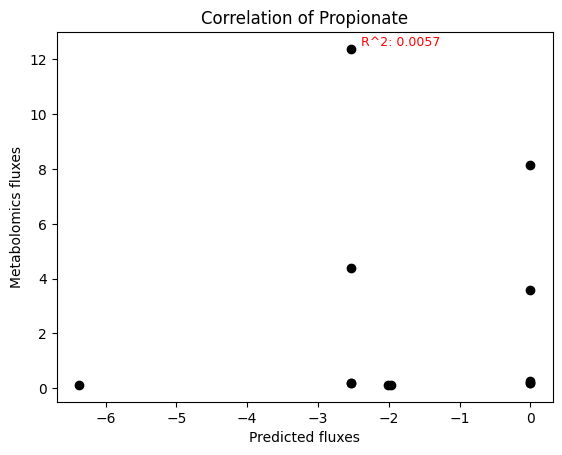

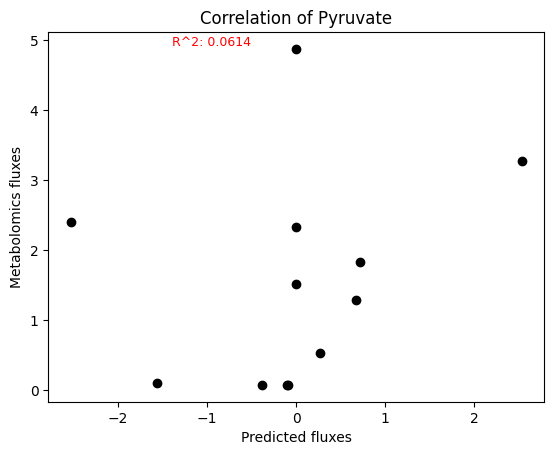

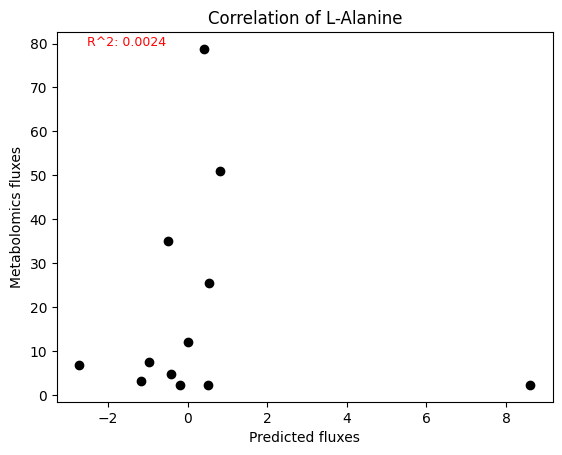

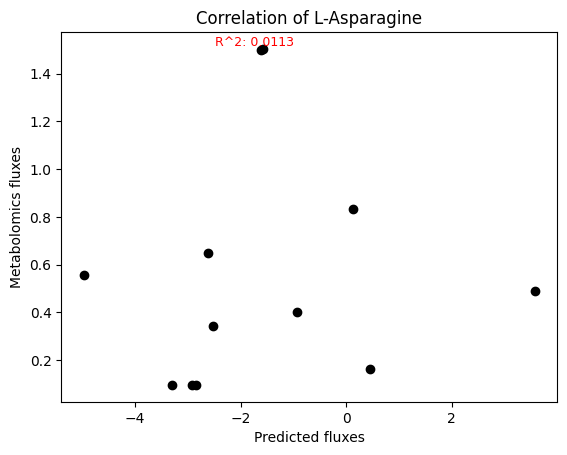

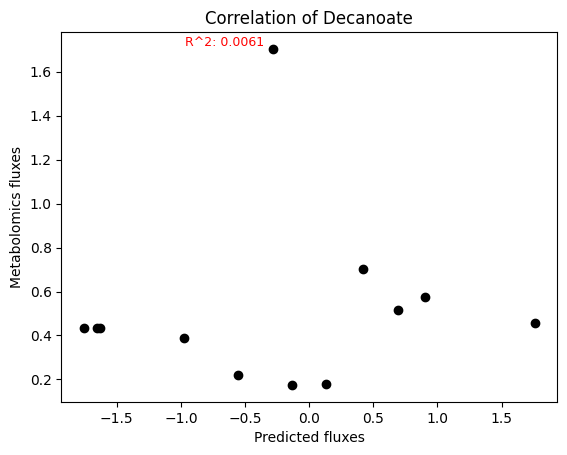

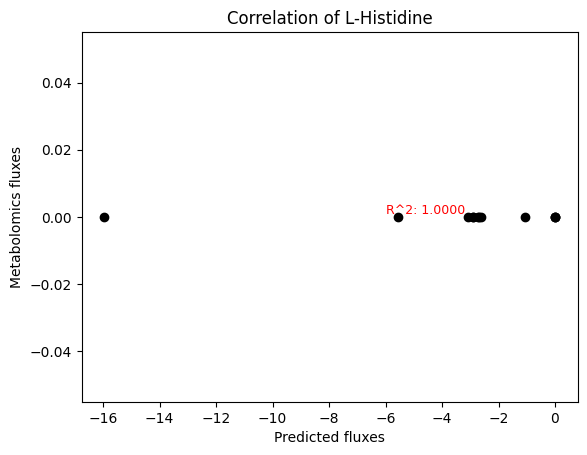

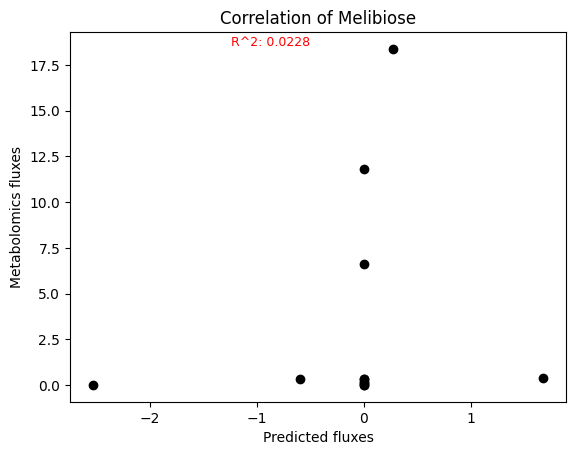

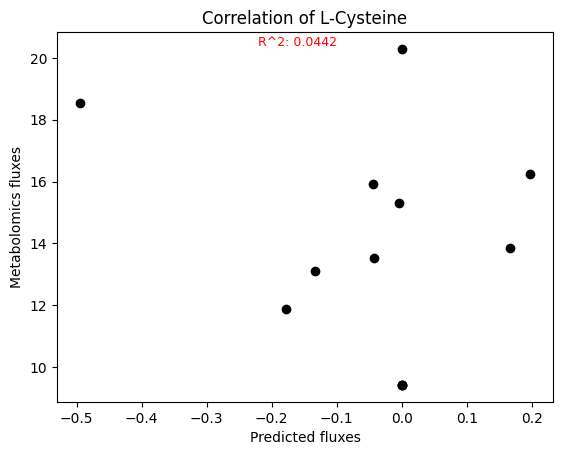

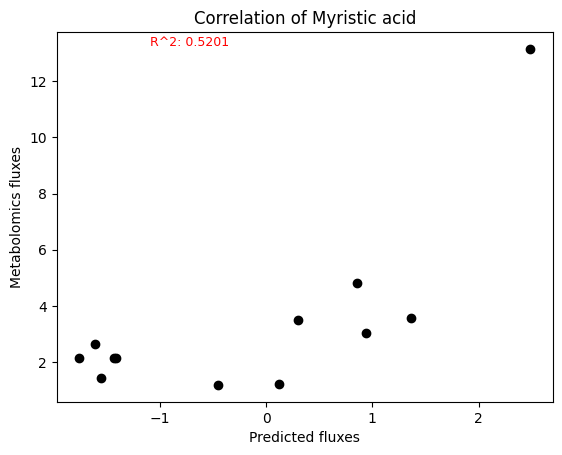

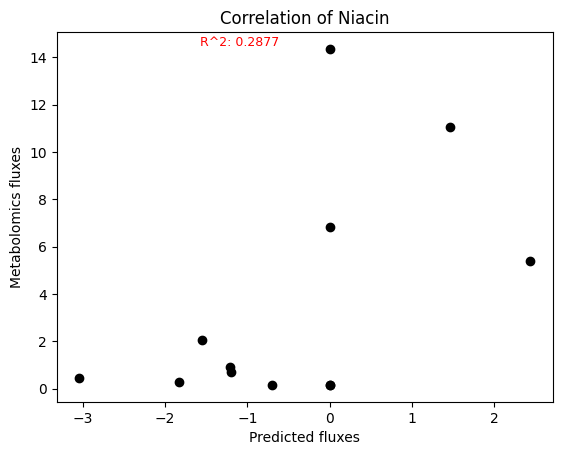

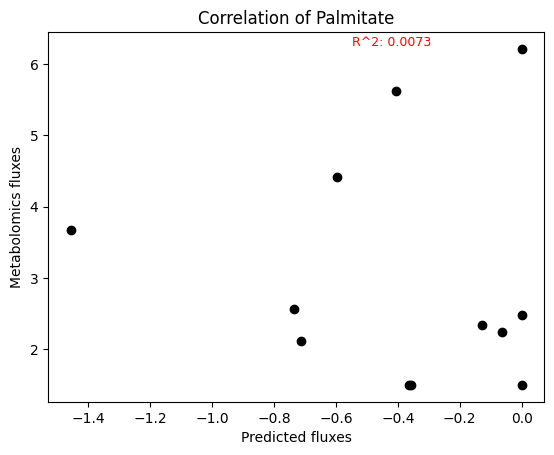

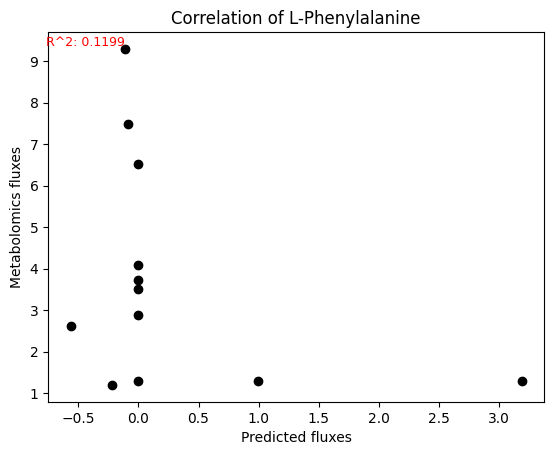

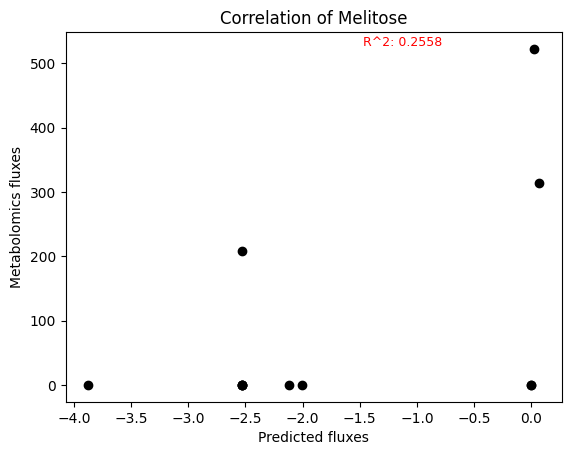

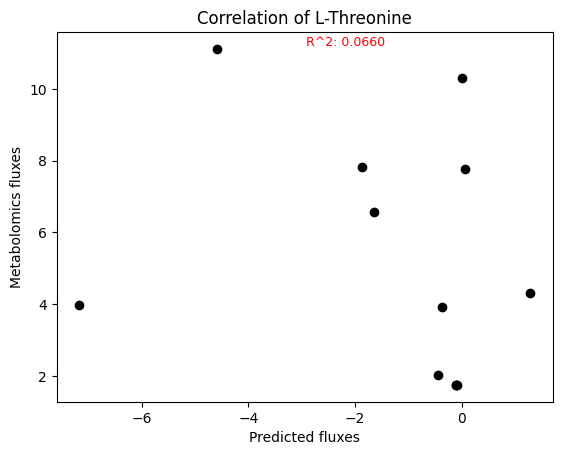

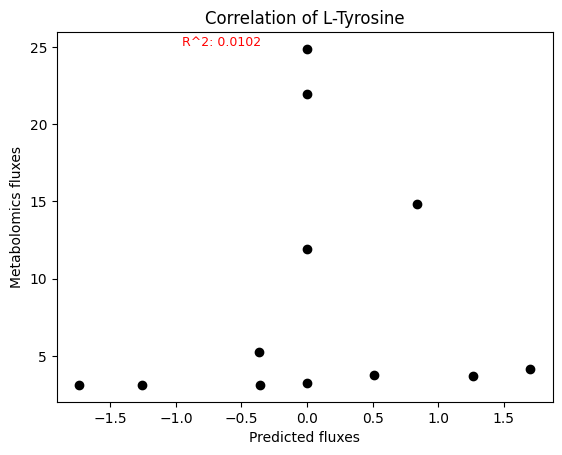

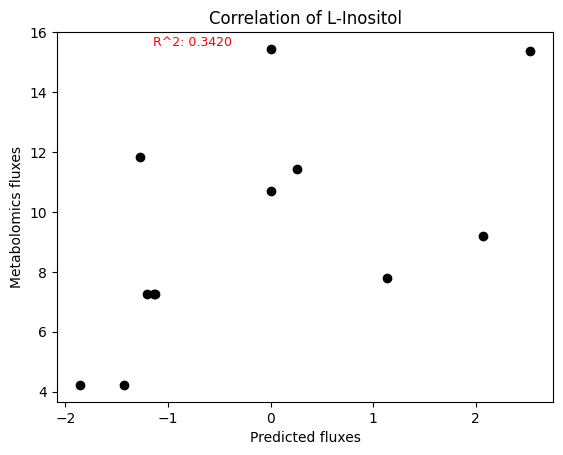

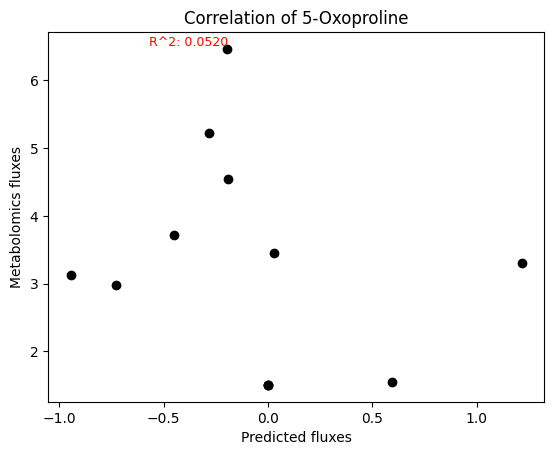

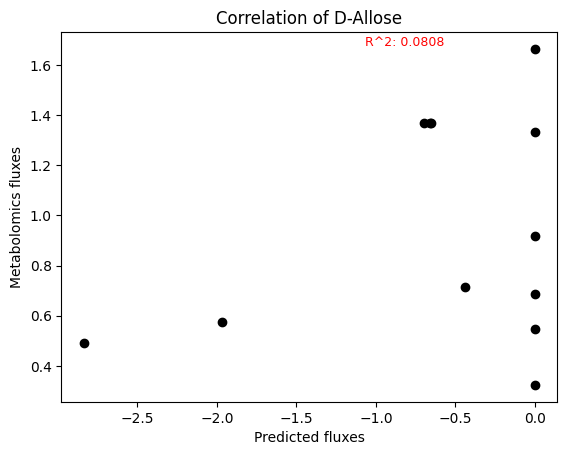

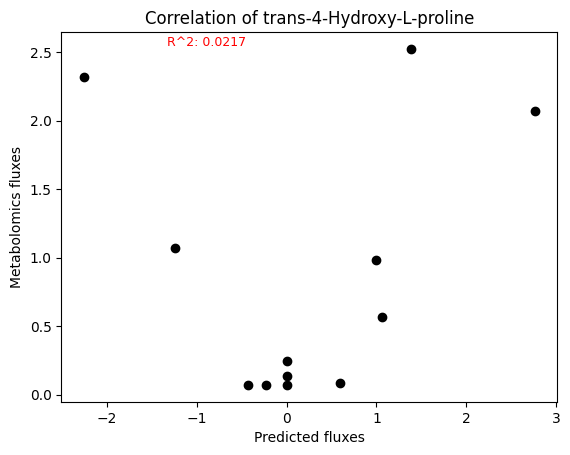

In [26]:
# Initialize the model with no intercept
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from numpy import array

for compound, content in values.items():
    if compound not in fluxesMetabolomics_mapping:   print(f"The {compound} has not been mapped, and is skipped")  ;  continue

    # Create the scatter plot
    xs, ys = array(list(content.values())).reshape(-1, 1), array(list(measured[fluxesMetabolomics_mapping[compound]].values()))
    model = LinearRegression()
    model.fit(xs, ys)

    # plot the correlation
    pyplot.figure()
    pyplot.scatter(xs, ys, color='black', label='Data Points')

    # Add labels and title
    pyplot.xlabel('Predicted fluxes')
    pyplot.ylabel('Metabolomics fluxes')
    pyplot.title(f'Correlation of {compound}')
    
    # add text labels for each point
    # from adjustText import adjust_text
    # texts = [pyplot.text(xs[i], ys[i], label, fontsize=10, ha='center', va='center') for i, label in enumerate(ys)]
    # adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), expand=(2.3, 2.3))
    pyplot.text(min(xs)*.2, max(ys), f"R^2: {model.score(xs, ys):.4f}", fontsize=9, ha='right', va='bottom', color='red')
    
    pyplot.savefig(f"correlationFigs/{compound}_fluxMetabolomics_correlation.png")

# processing the MAG-ASV matching

In [1]:
from pandas import read_csv

MAGasv = read_csv("ASV_MAG_SSO_Match.csv").set_index("asv").drop(["mag"], axis=1)
MAGasv.rename(columns={"Unnamed: 5": "precent_diff"}, inplace=True)
MAGasv = MAGasv.iloc[:7].astype(int)
MAGasv

,match_count,asv_unique,mag_unique,precent_diff
asv,,,,
Lactococcus.1,1383,446,8,0
Muribaculum.1,933,336,193,0
Lactobacillus.4,1028,1320,17,0
Bacteroides.3,1498,958,89,0
Bacteroides.3,1493,963,79,0
Bifidobacterium.1,935,3448,40,0
Parabacteroides.1,1598,471,72,0


In [104]:
from matplotlib_venn import venn2

# Create Venn diagram

for index, row in MAGasv.iterrows():
    from matplotlib import pyplot, patheffects
    venn = venn2(subsets=(row["asv_unique"], row["mag_unique"], row["match_count"]),
                 set_colors=('purple', 'green'), set_labels=('ASV', 'MAG'))
    venn.patches[2].set_facecolor('lightgreen')   # Change the fill color
    
    ## update the set labels
    text = pyplot.text(0, 0.6, 'Shared', fontsize=20, ha='center', color='lightgreen')
    text.set_path_effects([
        patheffects.Stroke(linewidth=1, foreground='black'),  # Stroke (outline)
        patheffects.Normal()  # Normal text rendering
    ])
    text2 = pyplot.text(0, -0.67, index, fontsize=20, ha='center', color='black')
    
    venn.set_labels[0].set_position((-0.7, 0))  # Move label for Set A
    venn.set_labels[0].set_fontsize(20)  # Set font size for Set A
    venn.set_labels[0].set_color('purple')  # Set color for Set A
    venn.set_labels[0].set_path_effects([
        patheffects.Stroke(linewidth=0.5, foreground='black'),  # Add stroke
        patheffects.Normal()  # Render text normally
    ])
    
    venn.set_labels[1].set_position((0.65, 0))   # Move label for Set B
    venn.set_labels[1].set_fontsize(20)  # Set font size for Set B
    venn.set_labels[1].set_color('green') # Set color for Set B
    venn.set_labels[1].set_path_effects([
        patheffects.Stroke(linewidth=0.5, foreground='black'),  # Add stroke
        patheffects.Normal()  # Render text normally
    ])
    
    ## update the numbers
    for i, label in enumerate(venn.subset_labels):
        if label:  # Check if the label exists
            # if i == 2:
            #     label.set_text("Shared: 2 items")
            label.set_fontsize(17)     # Change font size
            label.set_color('black')    # Change font color
    
    # Display the plot
    # pyplot.title("2-Set Venn Diagram")
    pyplot.savefig(f"{index}_Venn.png", dpi=300, bbox_inches='tight', transparent=True)
    pyplot.close()